# Calculate EKE. First roughly with speed, then variance of SSH

In [1]:
cd tasman-tides

/home/149/ab8992/tasman-tides


In [2]:
import argparse
import ttidelib as tt
import os
import numpy as np

# os.chdir("tasman-tides")
import subprocess
import time
from dask.distributed import Client,default_client
from matplotlib import pyplot as plt
from pathlib import Path
home = Path("/home/149/ab8992/tasman-tides")
gdata = Path("/g/data/nm03/ab8992")
%matplotlib inline
import matplotlib
import xarray as xr
def startdask():
    try:
    # Try to get the existing Dask client
        client = default_client()
        print(client)
    except ValueError:
        # If there's no existing client, create a new one
        client = Client()

startdask()

## Calculate with speed

In [4]:
import cmocean
import xarray as xr

cmap = cmocean.cm.dense_r
earth_cmap = matplotlib.cm.get_cmap("gist_earth")

speed = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/notide-20/output*/surface.nc",
                          decode_times = False,decode_cf = False,parallel = True).speed.isel(time = slice(4 * 365,None))

zos = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/notide-20/output*/surface.nc",
                          decode_times = False,decode_cf = False,parallel = True).zos.isel(time = slice(4 * 365,None))


bathy = xr.open_mfdataset("/g/data/nm03/ab8992/ttide-inputs/full-20/topog_raw.nc").elevation
bathy = bathy.where(bathy > 0).compute()
speed_mean = speed.mean("time").compute()
speed_anom = (((speed - speed_mean))**2).mean("time").compute()



# ax.text(0.95, 0.95, f"Day {int(data.time.values//24)}", transform=ax.transAxes, fontsize=15, va="top", ha="right",color = "linen")


/jobfs/109727924.gadi-pbs/ipykernel_1468552/2494906878.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  earth_cmap = matplotlib.cm.get_cmap("gist_earth")


/jobfs/109298488.gadi-pbs/ipykernel_2069638/3710942815.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  earth_cmap = matplotlib.cm.get_cmap("gist_earth")


Text(0, 0.5, 'Latitude')

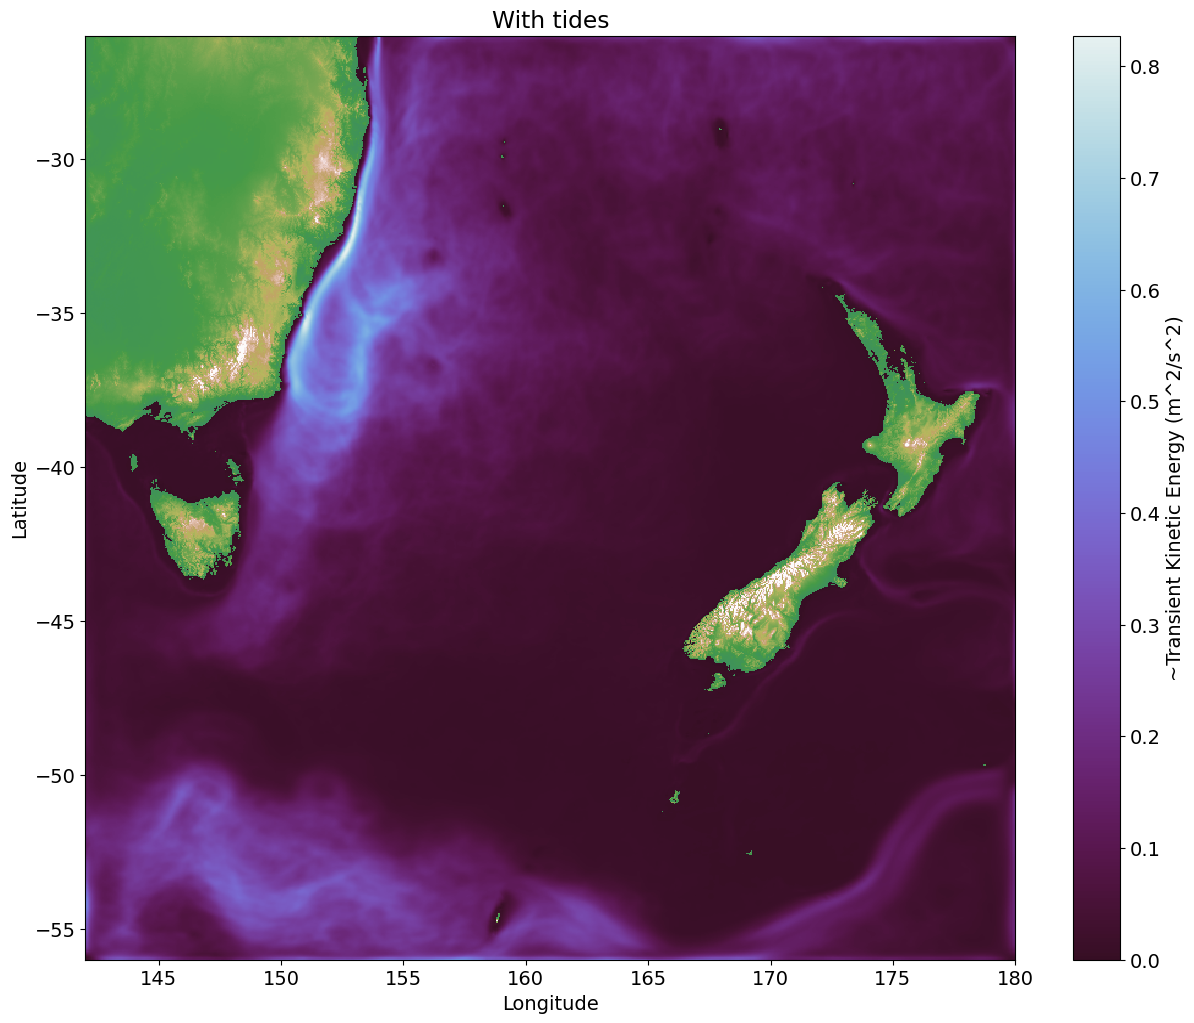

2024-02-26 17:18:06,545 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/distributed/utils_comm.py", line 455, in retry_operation
    return await retry(
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/distributed/utils_comm.py", line 434, in retry


In [23]:
cmap = cmocean.cm.dense_r
bathy = xr.open_mfdataset("/g/data/nm03/ab8992/ttide-inputs/full-20/topog_raw.nc").elevation
bathy = bathy.where(bathy > 0).persist()
%matplotlib inline


earth_cmap = matplotlib.cm.get_cmap("gist_earth")
fig,ax = plt.subplots(1,figsize = (15,12))
# Set the background colour to the plot to the lowest value in the cmap
ax.set_facecolor(cmap(0))

speed_anom.plot(ax = ax,cmap = cmap,add_colorbar = True,cbar_kwargs={'label': "~Transient Kinetic Energy (m^2/s^2)"})
bathy.plot(cmap = earth_cmap,vmin = -1000,vmax = 1500,ax = ax,add_colorbar = False)


ax.set_title("With tides")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

/jobfs/109298488.gadi-pbs/ipykernel_2059823/247072318.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  earth_cmap = matplotlib.cm.get_cmap("gist_earth")


Text(0, 0.5, 'Latitude')

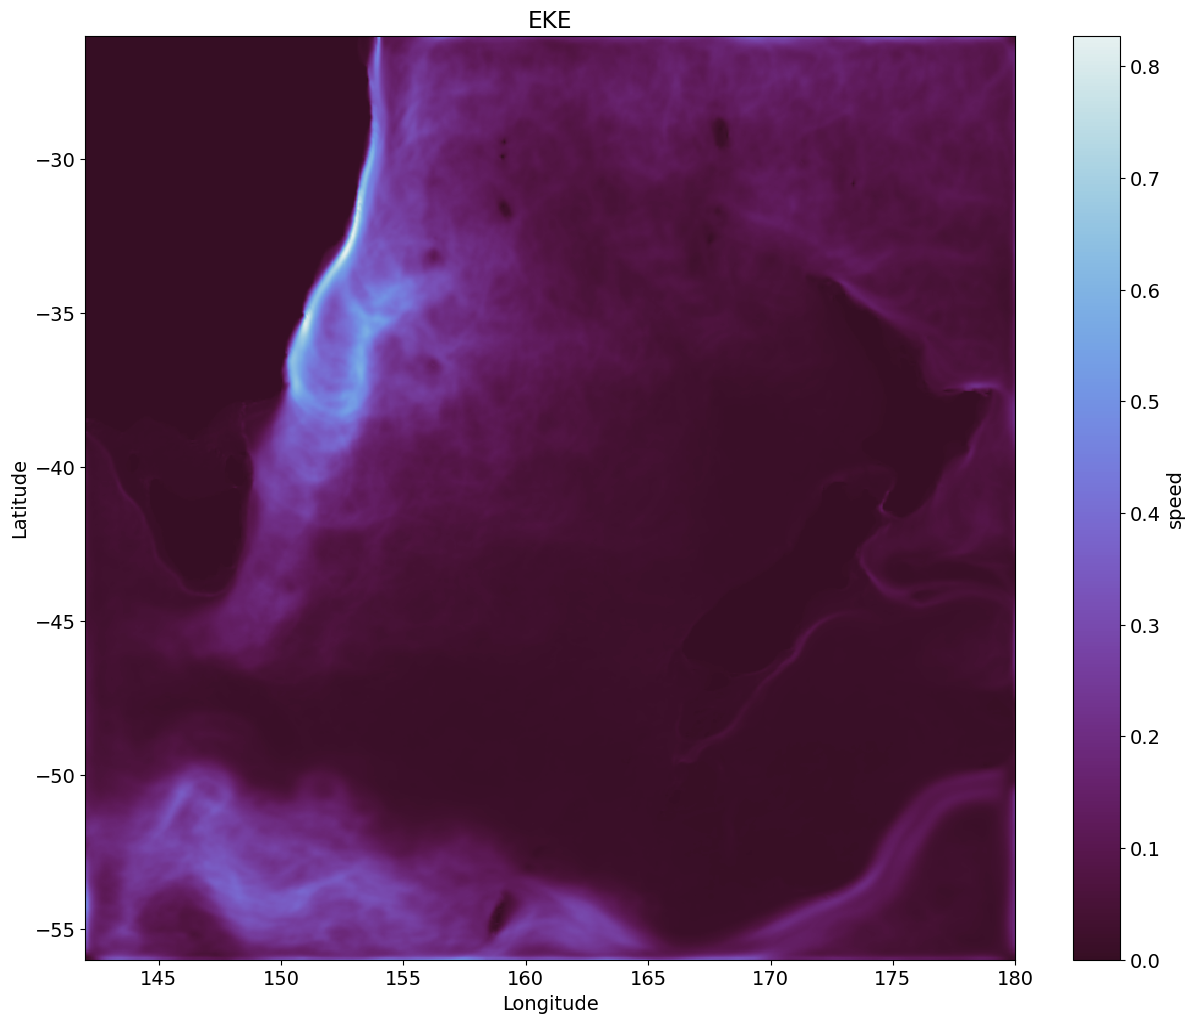

2024-02-26 12:41:26,618 - distributed.worker - ERROR - failed during get data with tcp://127.0.0.1:43513 -> tcp://127.0.0.1:44551
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/tornado/iostream.py", line 861, in _read_to_buffer
    bytes_read = self.read_from_fd(buf)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/tornado/iostream.py", line 1116, in read_from_fd
    return self.socket.recv_into(buf, len(buf))
TimeoutError: [Errno 110] Connection timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/distributed/worker.py", line 1780, in get_data
    response = await comm.read(deserializers=serializers)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/distributed/comm/

In [37]:
import cmocean
import xarray as xr
import matplotlib
speed = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/notide-20/output*/surface.nc",
                          decode_times = False,decode_cf = False,parallel = True).speed.isel(time = slice(4 * 365,None))
bathy = xr.open_mfdataset("/g/data/nm03/ab8992/ttide-inputs/full-20/topog_raw.nc").elevation

speed_anom = (((speed - speed.mean("time")))**2).mean("time").compute()
eke = speed.rolling(time = 28).mean()**2

eke.mean("time")
eke_mean = eke.mean("time").persist()


cmap = cmocean.cm.dense_r
earth_cmap = matplotlib.cm.get_cmap("gist_earth")
fig,ax = plt.subplots(1,figsize = (15,12))
# Set the background colour to the plot to the lowest value in the cmap
ax.set_facecolor(cmap(0))

bathy.plot(cmap = earth_cmap,vmin = -1000,vmax = 1500,ax = ax,add_colorbar = False)
speed_anom.plot(ax = ax,cmap = cmap,add_colorbar = True)

ax.set_title("")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

## Calculate Sea Level RMS

In [3]:
import cmocean
import xarray as xr
import matplotlib

def plot_rms_eta(data,title,vmax = None):

    eta_mean = data.zos.mean("time")
    eta2_mean = (data.zos**2).mean("time")
    rms_eta = calculate_rms_eta(data.zos)
    fig,ax = plt.subplots(1,figsize = (15,12))
    # Set the background colour to the plot to the lowest value in the cmap
    ax.set_facecolor(cmap(0))
    
    data.bathy.plot(cmap = earth_cmap,vmin = -1000,vmax = 1500,ax = ax,add_colorbar = False)
    rms_eta.plot(ax = ax,cmap = cmap,add_colorbar = True,vmax=vmax,cbar_kwargs={'label': "RMS Sea Surface Height (m)"})
    ax.set_title(title)
    return fig

def calculate_rms_eta(eta):
    eta_mean = eta.mean("time")
    eta2_mean = (eta**2).mean("time")
    return np.sqrt((eta2_mean - eta_mean**2))


In [4]:
zos_full = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/full-20/output*/surface.nc",
                          decode_times = False,decode_cf = False,parallel = True).zos.isel(time = slice(4 * 365,None)).rolling(time = 8).mean()

zos_notide = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/notide-20/output*/surface.nc",
                          decode_times = False,decode_cf = False,parallel = True).zos.isel(time = slice(4 * 365,None)).rolling(time = 8).mean()

bathy = xr.open_mfdataset("/g/data/nm03/ab8992/ttide-inputs/full-20/topog_raw.nc").elevation
bathy = bathy.where(bathy > 0).compute().rename("bathy")


0.3.0


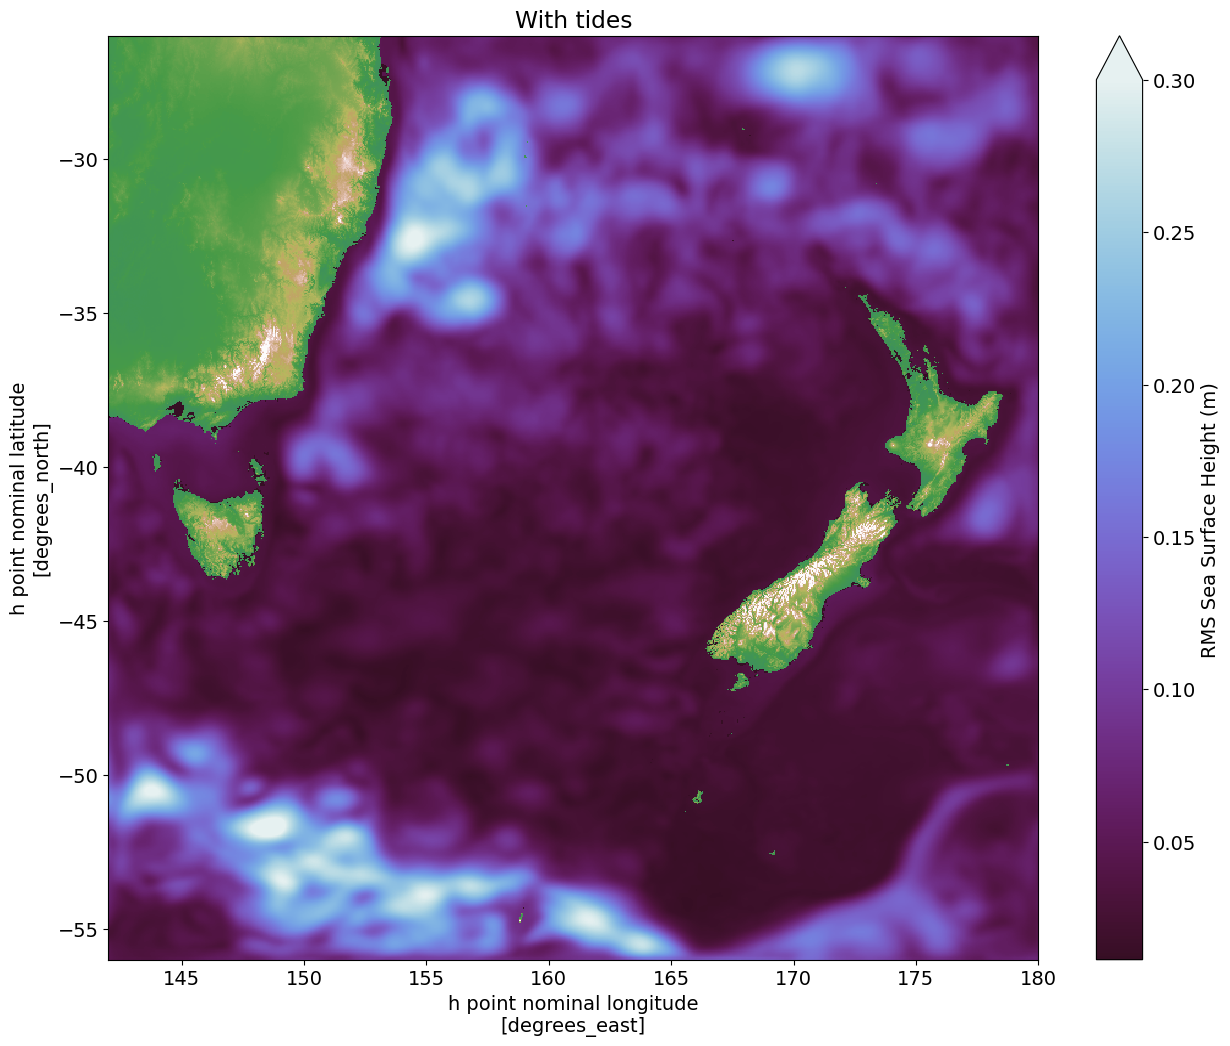

In [49]:
fig = plot_rms_eta(xr.merge([zos_full,bathy]),"With tides",vmax = 0.3)


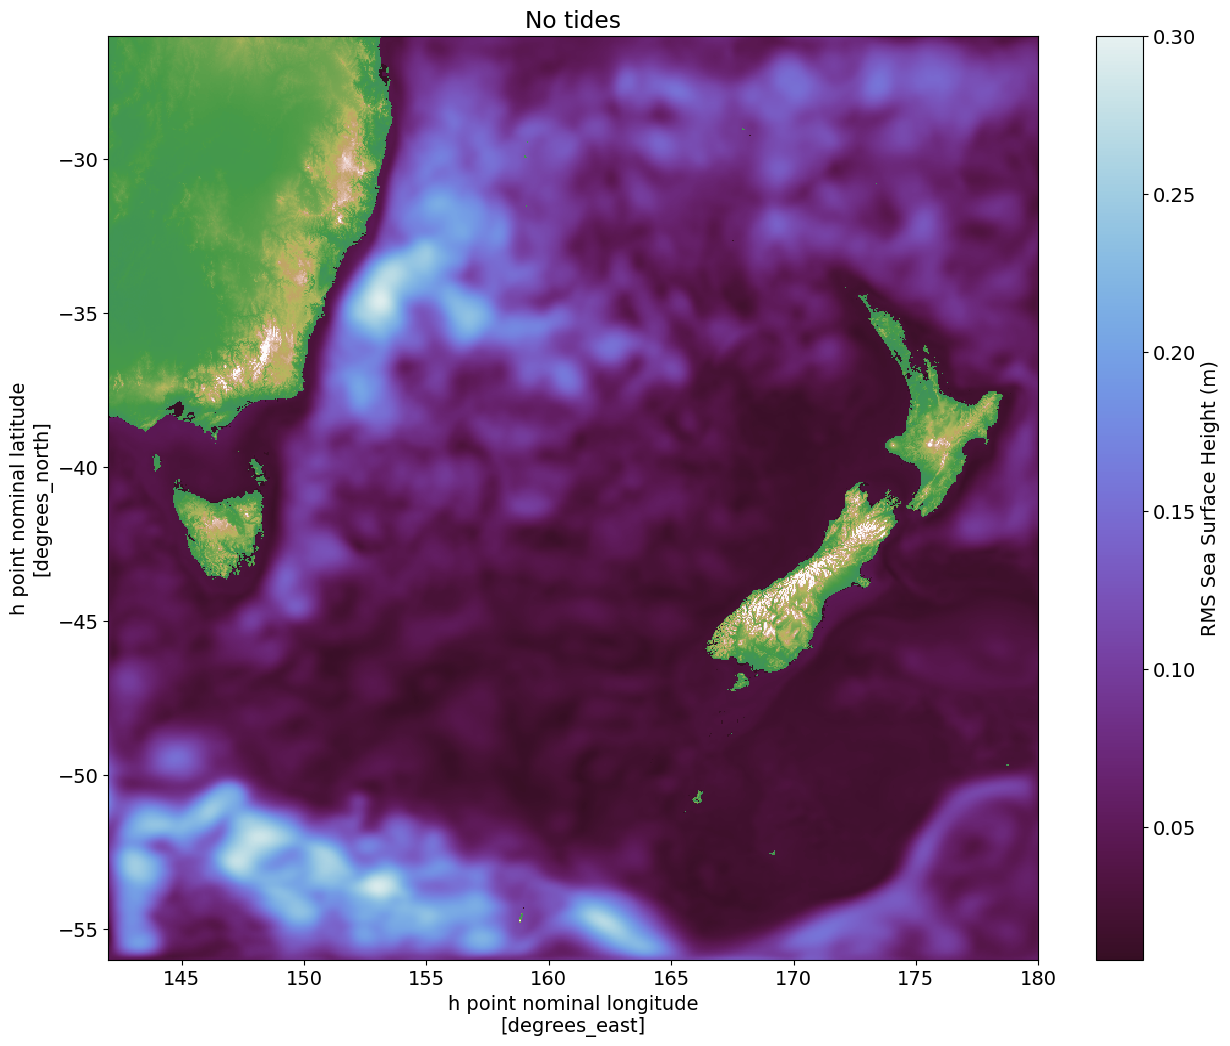

In [48]:
fig = rms_eta(xr.merge([zos_notide,bathy]),"No tides",vmax = 0.3
)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: overflow encountered in square
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: overflow encountered in square
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: overflow encountered in square
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: overflow encountered in square
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: overflow encountered in square
  return func(*(_execute_t

NameError: name 'cmap' is not defined

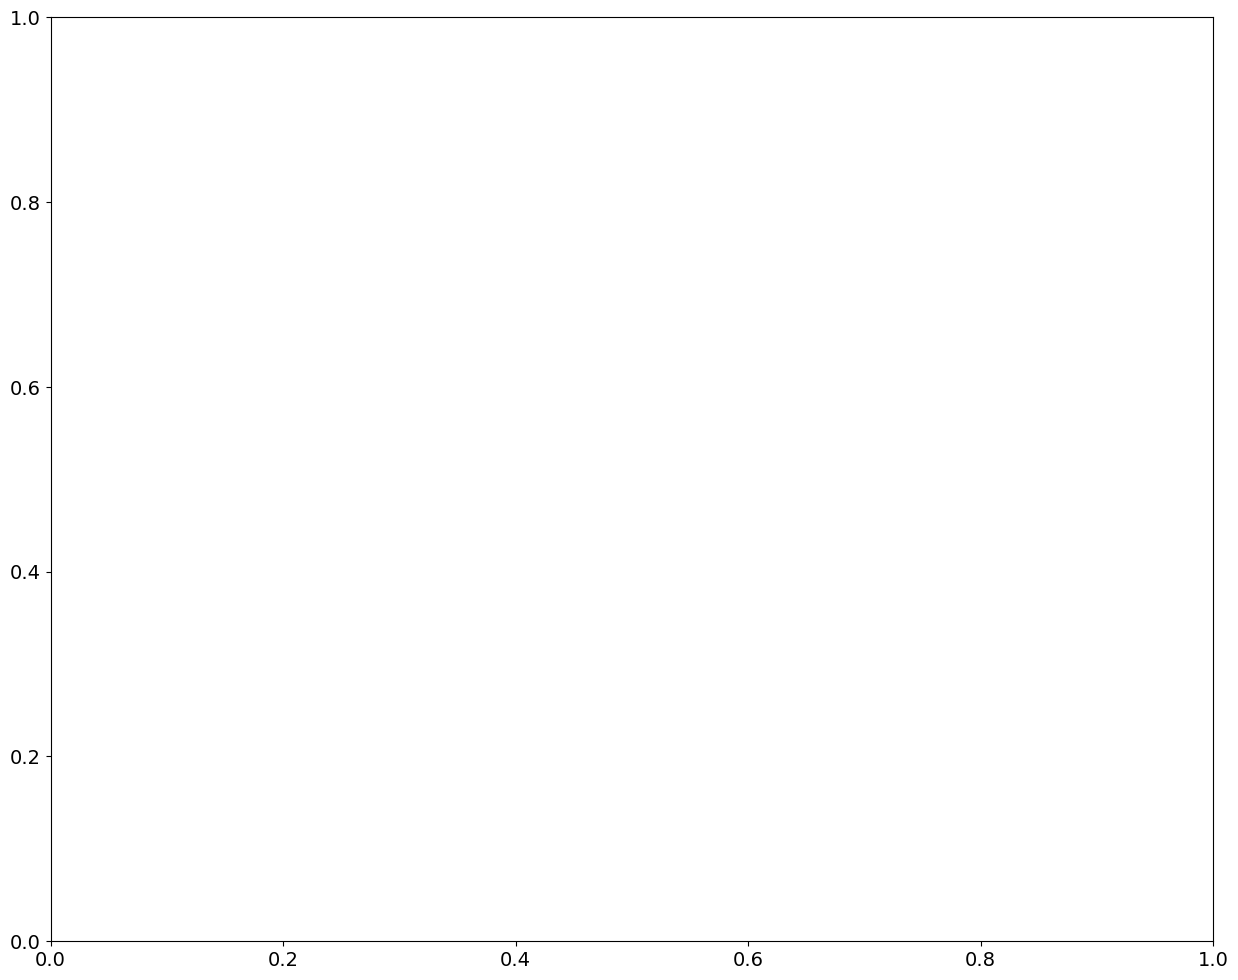

In [5]:
## Plot anomaly

rms_eta_full = calculate_rms_eta(zos_full).compute()
rms_eta_notide = calculate_rms_eta(zos_notide).compute()


fig,ax = plt.subplots(1,figsize = (15,12))
# Set the background colour to the plot to the lowest value in the cmap
ax.set_facecolor(cmap(0))

bathy.plot(cmap = earth_cmap,vmin = -1000,vmax = 1500,ax = ax,add_colorbar = False)
(rms_eta_full - rms_eta_notide).plot(ax = ax,cmap = "RdBu",add_colorbar = True,cbar_kwargs={'label': "RMS Sea Surface Height (m) anomaly. Positive is higher with tides"})
ax.set_title("RMS eta difference between tide - notide tide")
